# <font color= blue> <b> Análisis Descriptivo de Series de Tiempo </b> </i> </font> 

###### **Presentado por:**
> Stefania \
  Jorge \
  Carolina

Para el análisis y modelamiento de las series de tiempo, se utilizaron datos diarios de la temperatura en Bogotá desde el 01 de enero del 2018 hasta el 31 de diciembre del 2021 y datos trimestrales del Producto Interno Bruto de Colombia (PIB) desde el primer trimestre del 2005 hasta el último trimestre del 2021.

### <font color= F30720> <b> <i> Temperatura diaria registrada en Bogotá entre 2018 y 2021 </i> </b> </font>
sta serie cuenta con un total de 1461 registros, de los cuales 11 fueron imputados puesto que no se presenta la información necesaria. Para ello fue necesario recurrir a la información de la página [Weather Spark](https://es.weatherspark.com/y/23324/Clima-promedio-en-Bogot%C3%A1-Colombia-durante-todo-el-a%C3%B1o), en donde se presentan los registros faltantes.
Esta serie fue extraída de la base de datos del IDEAM, se tuvieron en cuenta los promedios diarios de las temperaturas registradas en Bogotá en las diferentes estaciones climáticas que recolectaron información de esos días.

#### <font color= #199EDC> <b> Importación e imputación de datos  </b> </font>

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from sklearn.impute import KNNImputer
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf

In [ ]:
Temp = pd.read_csv("/content/drive/MyDrive/Series/Temperatura.csv", sep=';', header=0, decimal = ',', 
                   parse_dates = ['Fecha'])
Temp = Temp.set_index('Fecha')
print(Temp.head())
print(Temp[pd.isnull(Temp.ValorObservado)])
print('En total hay' ,
      str(Temp['ValorObservado'].isnull().sum()) ,
      'valores sin información')

            ValorObservado
Fecha                     
2018-01-01           12.09
2018-01-02           11.63
2018-01-03           12.51
2018-01-04           12.31
2018-01-05           12.97
            ValorObservado
Fecha                     
2019-09-15             NaN
2019-09-16             NaN
2019-09-17             NaN
2020-11-12             NaN
2021-01-05             NaN
2021-01-06             NaN
2021-01-07             NaN
2021-01-08             NaN
2021-08-18             NaN
2021-08-20             NaN
2021-12-05             NaN
En total hay 11 valores sin información


In [ ]:
print(Temp.info())
print(Temp.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2018-01-01 to 2021-12-31
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ValorObservado  1450 non-null   float64
dtypes: float64(1)
memory usage: 22.8 KB
None
       ValorObservado
count     1450.000000
mean        11.724931
std          1.461353
min          7.710000
25%         10.720000
50%         11.490000
75%         12.757500
max         16.270000


In [ ]:
#Imputación de Valores usando el vecino más cercano
imput = KNNImputer(n_neighbors=5, weights="uniform")

# Ajustamos el modelo e imputamos los missing values
imput.fit(Temp[['ValorObservado']])
Temp['ValorObservado'] = imput.transform(Temp[['ValorObservado']]).ravel()

print("Valores pérdidos en ValorObservado: " , 
      str(Temp['ValorObservado'].isnull().sum()))

KNNImputer()

Valores pérdidos en ValorObservado:  0


In [ ]:
Temp['2021-01-02':'2021-01-12']

,ValorObservado
Fecha,
2021-01-02,14.500000
2021-01-03,14.860000
2021-01-04,11.770000
2021-01-05,11.724931
2021-01-06,11.724931
2021-01-07,11.724931
2021-01-08,11.724931
2021-01-09,13.900000
2021-01-10,14.100000


Text(0.5, 0, 'Fecha')

Text(0, 0.5, 'Temperatura promedio')

Text(0.5, 1.0, 'Serie de la Temperatura diaria registrada en Bogotá')

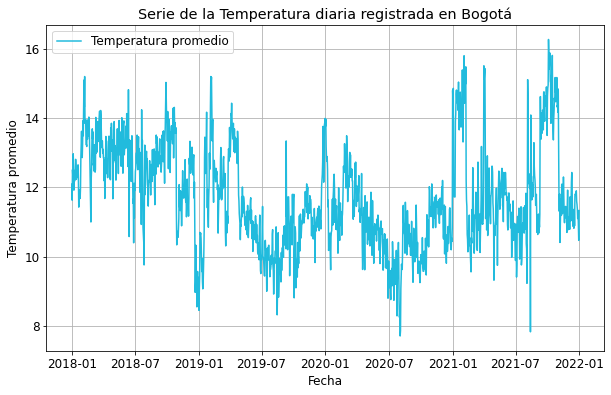

In [ ]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(Temp, color='#21BBDD', label='Temperatura promedio')
ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura promedio')
ax.set_title('Serie de la Temperatura diaria registrada en Bogotá')
ax.grid(True)
ax.legend(loc='upper left')

#### <font color= #199EDC> <b> Transformación de Box-Cox para Estabilizar la Varianza Marginal </b> </font>
La serie aparentemente no presenta varianza marginal no constante, sin embargo, vamos a verificarlo haciendo una transformación de Box-Cox para no tener inconvenientes en el análisis futuro de la serie.

$$
	f_{\lambda}(u_{t})= \begin{cases}
		\lambda^{-1}(u^{\lambda}_{t}-1), &  \text{si  $u_{t} \geq 0$, para $\lambda>0$,}\\
		\ln(u_{t}), &\text{ si $u_{t}>0$, para $\lambda=0$}.
	\end{cases}
$$

Para obtener el lambda

(array([2.05057272, 2.02458777, 2.07331398, ..., 1.98266282, 1.95337542,
        2.006989  ]),
 -0.16201660302434354,
 (-0.5203757597278904, 0.19829691341714747))

Text(0.5, 0, 'Fecha')

Text(0, 0.5, 'Ln temperatura promedio')

Text(0.5, 1.0, 'Serie con tranformación Box-Cox')

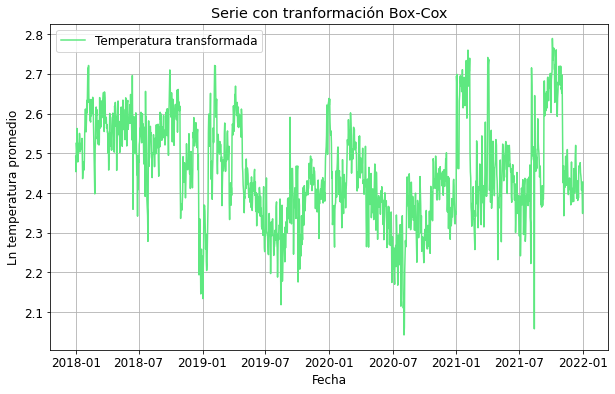

In [ ]:
#Transformación Box-Cox
import scipy as sp
import scipy.stats 
sp.stats.boxcox(Temp['ValorObservado'],alpha=0.05)
LTemp = sp.stats.boxcox(Temp['ValorObservado'],lmbda=0)
LTemp = Temp.assign(LTemp = LTemp) 

plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(LTemp['LTemp'], color='#5EE880', label='Temperatura transformada')
ax.set_xlabel('Fecha')
ax.set_ylabel('Ln temperatura promedio')
ax.set_title('Serie con tranformación Box-Cox')
ax.grid(True)
ax.legend(loc='upper left')
plt.show()

Veamos si la transformación tuvo algun efecto

In [ ]:
sp.stats.boxcox(LTemp['LTemp'],alpha=0.05)

(array([1.20033376, 1.17396507, 1.22340315, ..., 1.13139456, 1.10163152,
        1.15609978]),
 0.5736705918766178,
 (-0.29670535842624, 1.4513940530923268))

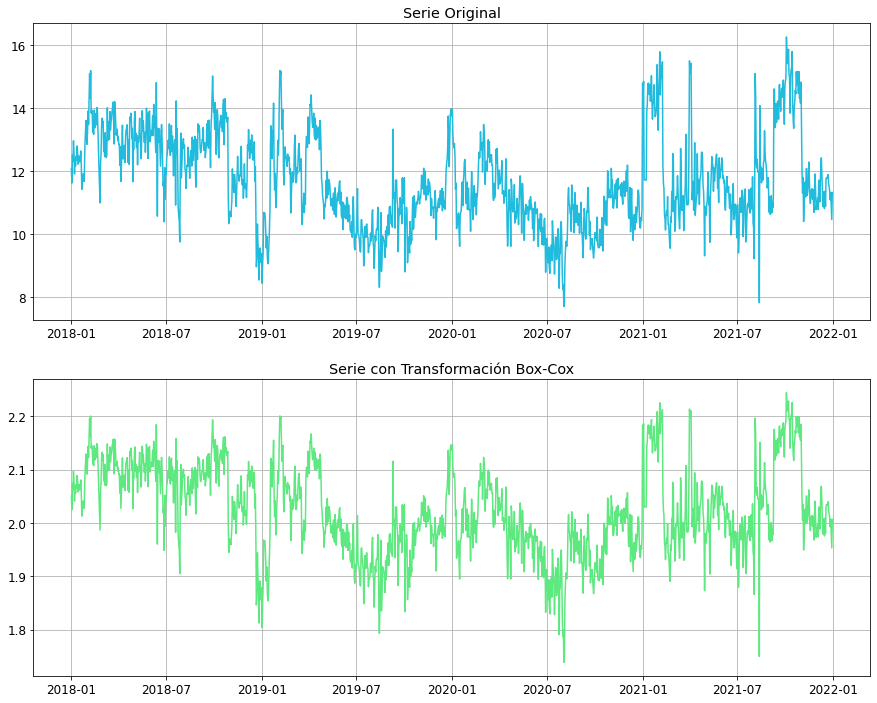

In [ ]:
InteractiveShell.ast_node_interactivity = "last"
plt.rc('font', size=12)
fig, axes = plt.subplots(2,1,figsize=(15,12)) 
axes[0].plot(Temp, color='#21BBDD', label='Temperatura promedio')
axes[0].title.set_text('Serie Original')
axes[0].grid(True)
axes[1].plot(TTemp['TTemp'], color='#5EE880')
axes[1].title.set_text('Serie con Transformación Box-Cox')
axes[1].grid(True)
plt.show()

#### <font color= 199EDC> <b> Análisis de Tendencia </b> </font>

A partir del gráfico anterior se puede observar que la serie parece ser estacionaria, sin embargo, para que su análisis sea adecuado, primero se debe averiguar si la serie presenta tendencia, a pesar de que pareciese no presentarla. No se realizo ajuste lineal, porque claramente no lo es.

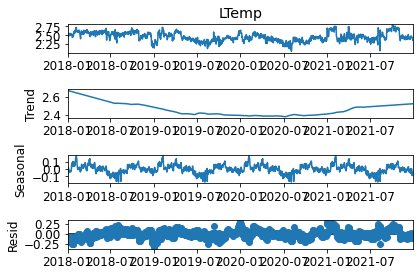

In [ ]:
####Descomposición usando filtros
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

###También se puede hacer vía STL###
result = seasonal_decompose(LTemp['LTemp'], model='additive',
                            extrapolate_trend=6, period=365 )

des_temp = result.plot()
pyplot.show()

#### <font color= 199EDC> <b> Gráfico de Retardos </b> </font>

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 't vs t-1')

Text(0.5, 1.0, 't vs t-2')

Text(0.5, 1.0, 't vs t-3')

Text(0.5, 1.0, 't vs t-4')

Text(0.5, 1.0, 't vs t-5')

Text(0.5, 1.0, 't vs t-6')

Text(0.5, 1.0, 't vs t-7')

Text(0.5, 1.0, 't vs t-8')

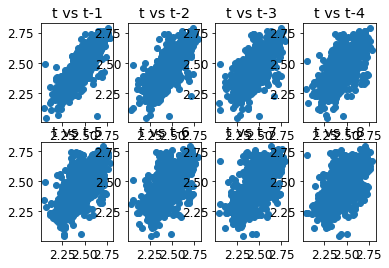

In [ ]:
from pandas.plotting import scatter_matrix
values = pd.DataFrame(LTemp['LTemp'].values)
lags = 8
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
plt.figure(1)
for i in range(1,(lags + 1)):
	ax = plt.subplot(240 + i)
	ax.set_title('t vs t-' + str(i))
	plt.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
plt.show()